In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, div.text_cell_render ol li p, code{font-size:22pt; line-height:30px;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
import warnings
import os
import logging
# 경고 제거
warnings.filterwarnings('ignore')

# transformers 로깅 레벨 조정
logging.getLogger("transformers").setLevel(logging.ERROR)

# Hugging Face symlink 경고 제거
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# from transformers import pipeline, logging as hf_logging
# hf_logging.set_verbosity_error()

# <span style="color:red">ch1_Hugging Face</span>
- Inference API 사용 : 모델의 결과를 server에서 돌림
- pipeline() 사용 : 모델을 다운로드 받아 모델의 결과를 local에서 돌림
    * raw text -> tokenizer -> model -> [0.11, 0.55, 0.xx] logits 값으로 prediction 결과 출력
```
Hugging Face transformers에서 지원하는 task
'sentiment-analysis' : 'text-classification'의 별칭(감정분석 전용으로 사용)
'text-classification' : 감정분석, 뉴스분류, 리뷰분류 등 일반적인 문장 분류
'zero-shot-classification' : 레이블을 학습 없이 주어진 후보군 중에서 분류
'token-classification' : 개체명 인식(NER : Named Entity Recognition) 등 단위 라벨링
'ner' : 'token-classification'의 별칭
'fill-mask' : 빈칸 채우기
'text-generation' : 텍스트 생성 (GPT류 모델에 사용)
'text2text-generation' : 번역, 요약 등 입력 -> 출력 변환
'translation' : 번역
'summerization' : 텍스트 요약
'question-answering' : 주어진 context를 보고 질문에 답하기
'image-to-text' : 그림 설명
'image-classification' : 이미지 분류
```

## 1.텍스트 기반 감정 분석(긍정/부정)
- c:/사용자/내컴퓨터명/.cache/huggingface/hub 모델 다운로드

In [3]:
from transformers import pipeline

In [4]:
classifier = pipeline(task='sentiment-analysis',
                      model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [5]:
classifier = pipeline(task='text-classification',
                      model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')
# 감정분석 시 내용이 많으면 list로 
classifier([
    "I've been waiting for a HuggingFace course my whole life.",
    'I hate this so much!'
])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [7]:
classifier(['이 영화 정말 최고였어',
            'This movie is the best movie I have ever watched']) # 위 모델은 영어로 학습한 모델로 한국어는 정확도가 많이 떨어짐

[{'label': 'POSITIVE', 'score': 0.870750904083252},
 {'label': 'POSITIVE', 'score': 0.9998502731323242}]

In [8]:
classifier('이 물건 정말 사고 싶어요')

[{'label': 'POSITIVE', 'score': 0.8577604293823242}]

In [9]:
classifier(['I like you', 'I hate you', '난 너가 싫어', '힘들어요'])

[{'label': 'POSITIVE', 'score': 0.9998695850372314},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079},
 {'label': 'POSITIVE', 'score': 0.5550515055656433},
 {'label': 'POSITIVE', 'score': 0.8669533729553223}]

In [10]:
classifier = pipeline(task="sentiment-analysis",
                     model="matthewburke/korean_sentiment")
classifier(['나는 너가 좋아', "당신이 싫어요", "힘들어요", "오늘 기분이 최고야"])

config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.9557897448539734},
 {'label': 'LABEL_0', 'score': 0.9092598557472229},
 {'label': 'LABEL_0', 'score': 0.9140233397483826},
 {'label': 'LABEL_1', 'score': 0.9714491367340088}]

In [11]:
classifier = pipeline(task="sentiment-analysis",
                     model="matthewburke/korean_sentiment")
texts = ['나는 너가 좋아', "당신이 싫어요", "힘들어요", "오늘 기분이 최고야"]
result = classifier(texts)

Device set to use cpu


In [23]:
for text, result in zip(texts, classifier(texts)):
    label = '긍정' if result['label']=='LABEL_1' else '부정'
    print(f"{text} => {label} : {result['score']:.4f}")

나는 너가 좋아 => 긍정 : 0.9558
당신이 싫어요 => 부정 : 0.9093
힘들어요 => 부정 : 0.9140
오늘 기분이 최고야 => 긍정 : 0.9714


## 2.zero-shot 분류
- 기계 학습 및 자연어 처리에서 각 개별 작업에 대한 특정 교육 없이 작업을 수행할 수 있는 모형(비지도 학습)

In [24]:
classifier = pipeline('zero-shot-classification',
#                       model='facebook/bart-large-mnli'
                     )
classifier(
    "I have a problem with my iphone that needs to be resolved asap!",
    candidate_labels=['urgent', 'not urgent', 'phone', 'tablet', 'computer']
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5227580070495605,
  0.45814019441604614,
  0.0142647260800004,
  0.0026850001886487007,
  0.002152054337784648]}

In [25]:
sequence_to_classify = "One day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
classifier(sequence_to_classify, candidate_labels)

{'sequence': 'One day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9941016435623169, 0.0031261250842362642, 0.0027722232043743134]}

## 3.text 생성

In [28]:
# from transformers import set_seed
# set_seed(2) # 시드값 맞추기
generation = pipeline('text-generation') # 텍스트 생성 gpt3부터는 Hugging Face에 없음
generation(
    "In this course, we will teach you how to",
    pad_token_id=generation.tokenizer.eos_token_id
) # pad_token_id 경고를 없애려고 setting

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'generated_text': 'In this course, we will teach you how to design and build an app for the iPhone or the iPad. It will be used with the iPad Pro 2 and later. We will also show you how to make a simple and easy to use program for the iPhone or iPad.\n\nThis course is available for students who are not familiar with app development. It is designed to teach you how to make apps for the iPad.\n\nYou will learn the basics of App development and how to build apps using the iPhone or iPad. You will also learn the fundamentals of using the iOS SDK.\n\nWe will cover the most common components of a typical app. We will develop the components and add them to the app. We will do the rest.\n\nWe will cover the most common components of a typical app. We will develop the components and add them to the app. We will do the rest. You will learn how to use the iOS SDK to develop a large number of apps. We will then show you how to add components to your app and use them to your advantage.\n\nYou will

In [31]:
result = generation(
    "In this course, we will teach you how to",
    pad_token_id=generation.tokenizer.eos_token_id
)

print(result[0]['generated_text'])

In this course, we will teach you how to use your iPad to navigate the world of virtual reality. We will explain how to create VR content, what to look for when looking for content and how to navigate your way to a virtual world. We will demonstrate how to create a virtual world when you are traveling with your iPad and how to avoid getting lost. This course will help you understand the rules of VR and how to navigate around virtual worlds.

In this course, we will teach you how to create VR content, what to look for when looking for content and how to navigate your way to a virtual world. We will demonstrate how to create a virtual world when you are traveling with your iPad and how to avoid getting lost. This course will help you understand the rules of VR and how to navigate around virtual worlds.

In this course, we will teach you how to create VR content, what to look for when looking for content and how to navigate your way to a virtual world. We will teach you how to create a vi

In [37]:
generation = pipeline('text-generation', 'skt/kogpt2-base-v2')
result = generation(
    "이 과정은 다음과 같은 방법을 알려 드립니다.",
    pad_token_id=generation.tokenizer.eos_token_id,
    max_new_tokens = 200, # 뒤에 생성할 최대 길이(생성할 토큰 수)
#     num_return_sequences = 1, # 생성할 문장 개수
#     do_sample=True, # 다양한 샘플 사용
#     top_k = 50, # top_k 샘플링(확률 높은 상위 50개 토큰만 사용)
#     top_p = 0.95, # 확률이 높은 순서대로 95%가 될 때까지의 단어들로만 후보로 사용
#     temperature = 1.0, # 창의성 조절(온도가 낮을수록 창의성 낮음)
#     no_repeat_ngram_size=2 # 반복 방지
)
print(result[0]['generated_text'])

Device set to use cpu


이 과정은 다음과 같은 방법을 알려 드립니다. 대구 남구청은 21일 오전 10시 시청 대회의실에서 대구시 남구의회(의장 이충훈)와 '사회복지사업 공동 추진 업무 협약'을 체결했다.
이번 협약은 지난해 7월 남구의회와 복지사업 업무협약 체결 이후 공동사업의 효율적인 추진을 위해 마련됐다.
협약 체결에 따라 남구는 사회복지사업 공동 추진에 필요한 행정적 지원을 할 예정이다.
또 남구는 올해 말까지 사회복지사업 공동추진위원회를 구성해 추진과제를 발굴, 사업추진에 적극 지원할 계획이다.
대구사회복지협의회는 남구 지역사회보장협의회와 함께 취약계층 지원에 관한 전문성을 갖춘 복지시설 운영자 및 종사자를 모집해 사회복지사업 공동 추진의 기반을 조성한다.
대구사회복지협의회는 실무위원회를 구성해 사회복지사업 공동추진위원회를 구성해 운영할 예정이다.
이충훈 대구 남구청장은 "이번 협약을 통해 양 기관이 지속적인 협력관계를 구축해 지역 내 사회복지서비스 수요자가 더욱 증가할 것으로 기대한다"고 말했다. 경찰이 박근혜 전 대통령의 출석을 앞두고 특별수사본부를 편성했다.
특


## 4.마스크(빈칸) 채우기

In [39]:
unmasker = pipeline(task='fill-mask',
                    model='distilbert/distilroberta-base') # 마스크 채우기 (영어로 학습 기준)

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [40]:
unmasker("I'm going to hospital and meet a <mask>",
         top_k=5) # top_k의 기본값은 5

[{'score': 0.19275707006454468,
  'token': 3299,
  'token_str': ' doctor',
  'sequence': "I'm going to hospital and meet a doctor"},
 {'score': 0.06794589757919312,
  'token': 27321,
  'token_str': ' psychiatrist',
  'sequence': "I'm going to hospital and meet a psychiatrist"},
 {'score': 0.06435535103082657,
  'token': 16308,
  'token_str': ' surgeon',
  'sequence': "I'm going to hospital and meet a surgeon"},
 {'score': 0.0591287724673748,
  'token': 9008,
  'token_str': ' nurse',
  'sequence': "I'm going to hospital and meet a nurse"},
 {'score': 0.05705631151795387,
  'token': 1441,
  'token_str': ' friend',
  'sequence': "I'm going to hospital and meet a friend"}]

In [42]:
unmasker("Hello, I'm a <mask> model.")

[{'score': 0.0629730075597763,
  'token': 265,
  'token_str': ' business',
  'sequence': "Hello, I'm a business model."},
 {'score': 0.038101598620414734,
  'token': 18150,
  'token_str': ' freelance',
  'sequence': "Hello, I'm a freelance model."},
 {'score': 0.03764132782816887,
  'token': 774,
  'token_str': ' role',
  'sequence': "Hello, I'm a role model."},
 {'score': 0.037326786667108536,
  'token': 2734,
  'token_str': ' fashion',
  'sequence': "Hello, I'm a fashion model."},
 {'score': 0.026023676618933678,
  'token': 24526,
  'token_str': ' Playboy',
  'sequence': "Hello, I'm a Playboy model."}]

In [46]:
unmasker = pipeline(task='fill-mask',
                    model='google-bert/bert-base-uncased')
unmasker("Hello, I'm a [MASK] model.")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'score': 0.1441437155008316,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello, i ' m a role model."},
 {'score': 0.14175789058208466,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello, i ' m a fashion model."},
 {'score': 0.062214579433202744,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello, i ' m a new model."},
 {'score': 0.041028350591659546,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello, i ' m a super model."},
 {'score': 0.025911200791597366,
  'token': 2449,
  'token_str': 'business',
  'sequence': "hello, i ' m a business model."}]

### ※ Inference API 사용

In [49]:
%pip install -q python-dotenv

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [51]:
from dotenv import load_dotenv
import os
load_dotenv()
# os.environ['HF_TOKEN']
# 허깅페이스 토큰을 READ 권한으로 생성하여 env에 추가

True

In [52]:
# unmasker = pipeline(task='fill-mask',
#                     model='google-bert/bert-base-uncased')
# unmasker("Hello, I'm a [MASK] model.")
from huggingface_hub import InferenceClient
client = InferenceClient(
            provider='hf-inference',
            api_key=os.environ['HF_TOKEN'], # HF token key
)
result = client.fill_mask(
    "Hello, I'm a [MASK] model.",
    model='google-bert/bert-base-uncased',
    top_k=2 # 기본 5개
)
result

[FillMaskOutputElement(score=0.1441427320241928, sequence="hello, i ' m a role model.", token=2535, token_str='role', fill_mask_output_token_str=None),
 FillMaskOutputElement(score=0.14175812900066376, sequence="hello, i ' m a fashion model.", token=4827, token_str='fashion', fill_mask_output_token_str=None)]

In [53]:
[f'{r.sequence} ({r.score:.2%})' for r in result] # 클래스 객체 조회

["hello, i ' m a role model. (14.41%)",
 "hello, i ' m a fashion model. (14.18%)"]

## 5.개체명 인식(NER : Named Entity Recognition)

In [56]:
ner = pipeline(task='ner', 
               model='dbmdz/bert-large-cased-finetuned-conll03-english',
               grouped_entities=True) # 개체들을 그룹으로 묶을지 말지
ner('My name is Sylvain and I work at Hugging Face in Brooklyn.')
# Syvain : 사람(PER)
# Hugging Face : 조직(ORG)
# Brooklyn : 장소(LOC)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

## 6.질의 응답

In [58]:
question_answerer = pipeline('question-answering',
                             model='distilbert/distilbert-base-cased-distilled-squad') # 질의 응답
question_answerer(
    question='Where do I work?',
    context='My name is Sylvain and I work at Hugging Face in Brooklyn.'
) # context를 참조하여 답하기

Device set to use cpu


{'score': 0.6385911703109741, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [59]:
context='My name is Sylvain and I work at Hugging Face in Brooklyn.'
result = question_answerer(question='Where do I work?', context=context)
result

{'score': 0.6385911703109741, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [64]:
result.get('answer'), context[result.get('start') : result.get('end')], result.get('score')

('Hugging Face', 'Hugging Face', 0.6385911703109741)

## 7.문서 요약
- 현재 torch 버전이 2.6보다 낮으면 Hugging Face에서 강제로 막고 있음

In [66]:
summarizer = pipeline(task='summarization',
                      model='sshleifer/distilbart-cnn-12-6')
summarizer(
    """
    “I was terrified, thinking, ‘I must be taken to a harsher place.’ But they sent me to the airport, saying, ‘You are being deported following strong U.S. demands.’ Secretary of State Pompeo was waiting for us in front of the U.S. Air Force plane, tears welling in his eyes.”
These are the words of Missionary Kim Hak-song, who was released from North Korean detention after one year, recounting the events of May 9, 2018, the day of his release. I had the opportunity to meet him through difficult inquiries when he visited South Korea in 2020. As a U.S. citizen, he had been teaching agricultural technology at Pyongyang University of Science and Technology since 2014 but was suddenly arrested in 2017 and confined to a solitary cell. He explained that an email he sent to acquaintances, asking them to “pray for the starving compatriots in North Korea,” was distorted into charges of “insulting the supreme dignity” and “defaming the republic.”
A year after his detention, the U.S. Air Force plane carrying Kim, Kim Dong-chul, and Kim Sang-deok arrived at an air force base near Washington, D.C., around 2:40 a.m. Recalling the moment, Kim said, “U.S. President Donald Trump and his wife, Melania, even entered the plane and shook hands, saying, ‘You are a hero.’” He added, “Though I am an immigrant who doesn’t even speak English well, I felt with my whole body that the nation takes responsibility for its citizens simply because they are American. It made me realize that the relationship between a state and its people is no different from that between parent and child.
His story resurfaced recently due to President Lee Jae-myung’s response at a foreign press conference, where he said, “I’m hearing about the detained South Koreans in North Korea for the first time.” National Security Adviser Wi Sung-lac also appeared flustered, unable to confirm the timeline or status of the detentions. The American journalist who asked the question criticized the president, saying, “It’s shocking that you are unaware of this situation,” causing international embarrassment.
The presidential office belatedly released a statement the next day, stating, “We have identified that six South Korean citizens have been detained between 2013 and 2016.” However, the safety and current condition of those detained for nearly a decade remain undisclosed.
Kim cited the 40th day of his detention as the turning point that helped him endure. Until then, North Korean authorities did not even allow him to wash. On that day, he met Joseph Yun, then the U.S. Special Representative for North Korea Policy. The meeting was arranged after the U.S. government strongly demanded North Korea confirm the fate of its citizen. Kim said, “The moment I confirmed that the government was paying attention to my safety, I found peace of mind even in despair. The South Korean government must also contact the six detained citizens to confirm their safety.” He emphasized that for those detained, the most important thing besides the “power to open the iron bars” is the signal that “they are not forgotten beyond the bars.”
The presidential office has officially stated that resolving the issue of detained citizens in North Korea is “urgent.” To prove the sincerity of this statement, special envoys or other means must be mobilized to confirm the safety of the six detained citizens as soon as possible. It is now time for the president to personally address what he previously did not know.""",
    max_length=130, # 요약할 내용의 최대 토큰 수
    min_length=30,  # 요약할 내용의 최소 토큰 수
    do_sample=False # 랜덤성이 없음/항상 비슷한 요약
)

Device set to use cpu


[{'summary_text': " Missionary Kim Hak-song was released from North Korean detention after one year . Frida Ghitis: President Lee Jae-myung said he heard about detained South Koreans in North Korea for the first time . Ghitis says it's time for the president to personally address what he previously didn't know . She says the South Korean government must also contact the six detained citizens ."}]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

## 8.번역
- pip install sacremoses : 한영번역에서의 경고를 줄이고 번역 품질의 제고를 위해 필요

In [68]:
translator = pipeline(task='translation',
                      model='Helsinki-NLP/opus-mt-fr-en')
# FR -> EN : Helsinki-NLP는 다양한 언어 지원
result = translator(
"""
Relations tendues entre Tokyo et Pékin
Le verrouillage est l’action par laquelle le radar d’un avion miliaire cesse de simplement balayer le ciel et commence à suivre une cible précise, en vue d’obtenir une solution de tir. Les avions de chasse modernes disposent de systèmes permettant de détecter qu’ils sont pris pour cible de cette façon.
Le ministère des affaires étrangères chinois a rejeté ces accusations et fait savoir qu’il avait, lui aussi, adressé sa propre protestation, a rapporté l’agence de presse officielle Chine nouvelle (Xinhua). Un porte-parole du ministère, également cité par l’agence, a par ailleurs exhorté le Japon à « cesser immédiatement ses manœuvres dangereuses visant à perturber les exercices et entraînements militaires normaux de la Chine ».
La marine chinoise avait auparavant déclaré que les affirmations japonaises étaient « totalement contraires à la réalité » et a demandé au Japon de « cesser immédiatement ses calomnies et ses diffamations ».
Les relations entre Pékin et Tokyo se sont tendues depuis que la nouvelle première ministre japonaise, Sanae Takaichi, a laissé entendre en novembre que son pays pourrait intervenir militairement en cas d’attaque contre Taïwan, île démocratique dont la Chine revendique la souveraineté.
"""

)
result[0]['translation_text']

Device set to use cpu


'Tensile relations between Tokyo and Beijing Locking is the action by which the radar of a militia aircraft stops simply sweeping the sky and begins to follow a specific target, with a view to obtaining a firing solution. Modern fighter aircraft have systems to detect that they are being targeted in this way. The Chinese Foreign Ministry rejected these accusations and stated that it had also addressed its own protest, reported the official Chinese news agency (Xinhua). A spokesman for the ministry, also quoted by the agency, also urged Japan to "immediately cease its dangerous manoeuvres aimed at disrupting China\'s normal military exercises and trainings." The Chinese Navy had previously stated that Japanese claims were "totally contrary to reality" and asked Japan to "immediately cease its slanders and defamations." Relations between Beijing and Tokyo have become tense since the new Japanese prime minister, Sanae Takaichi, suggested in November that his country could intervene milita

In [71]:
# 번역하는 모델은 성능이 천차만별. 모델과 라이브러리에 따라 추가 pip install이 필요할 경우도 있음
# KO -> DE
ko2de = pipeline(task='translation',
                 model='Helsinki-NLP/opus-mt-ko-de') # 번역은 모델이 기본값 없고 안 쓰면 에러 발생!
# EN -> KO(불량)
en2ko = pipeline(task='translation',
                 model='Helsinki-NLP/opus-mt-tc-big-en-ko')

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/838k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Device set to use cpu


In [72]:
# text for test
ko_sentence = '이 문장을 독일어로 번역해 주세요'
en_sentence = 'I enjoy learning about AI'
# 번역 수행
print('KO -> DE :', ko2de(ko_sentence)[0]['translation_text']) # 잘 안 됨!
print('EN -> KO :', en2ko(en_sentence)[0]['translation_text']) # 잘 안 됨!

KO -> DE : Ich möchte, dass Sie diesen Satz ins Deutsche übersetzen.
EN -> KO : US  풍선 행


In [73]:
ko2de([
    "내일부터는 langChain 진도 나갑니다",
    "Open AI API 진도 나갑니다",
    "카드를 지참하셔야 합니다"
])
# 동적 웹크롤링과 비교하여 선택

[{'translation_text': 'Von morgen an sind wir auf dem Weg nach LaangChain.'},
 {'translation_text': 'Ich bin bei Open AI API.'},
 {'translation_text': 'Sie müssen Ihre Karten behalten.'}]

## 9.이미지를 설명하는 텍스트 생성

In [6]:
image2text = pipeline(task='image-to-text',
                      model='ydshieh/vit-gpt2-coco-en')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [7]:
url = 'https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png'
result = image2text(url, max_new_tokens=100) # 최대 100 토큰으로 이미지에 대해 설명하는 text
result[0]['generated_text']

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'two birds are standing next to each other '

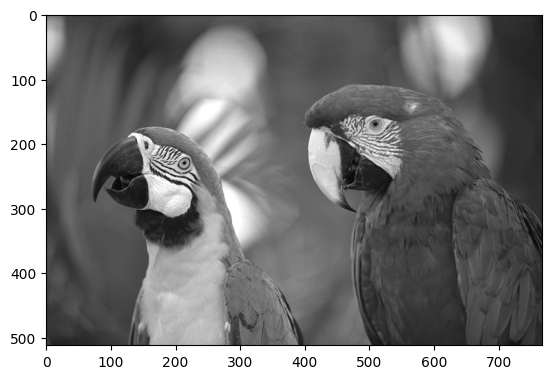

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
image = Image.open(requests.get(url, stream=True).raw) # 그림으로 가져오기 위하여
image_np = np.array(image)
plt.imshow(image_np, cmap='gray')
plt.show()

In [9]:
image2text(image)[0]['generated_text']

'two birds are standing next to each other '

In [10]:
url1 = 'http://images.cocodataset.org/val2017/000000039769.jpg'
result1 = image2text(url1, max_new_tokens=100) # 최대 100 토큰으로 이미지에 대해 설명하는 text
result1[0]['generated_text']

'a cat laying on a blanket next to a cat laying on a bed '

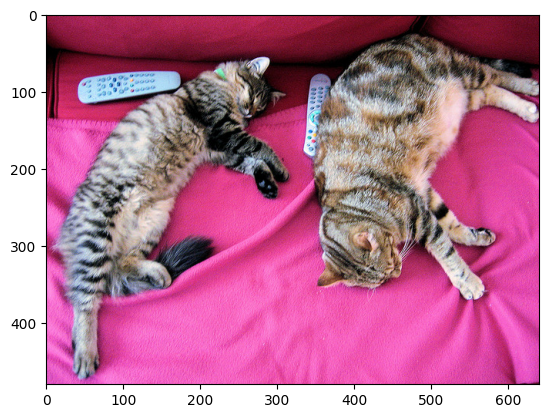

In [11]:
image_c = Image.open(requests.get(url1, stream=True).raw) # 그림으로 가져오기 위하여
plt.imshow(image_c)
plt.show()

In [12]:
image_c = Image.open(requests.get(url1, stream=True).raw)
image2text(image_c)[0]['generated_text']
# image2text에는 pillar 이미지나 url을 사용. numpy배열 사용 불가

'a cat laying on a blanket next to a cat laying on a bed '

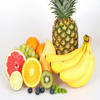

In [17]:
# local pc의 이미지를 설명
image_fruits = Image.open('images/fruits.jpeg')
image_fruits.resize((100, 100))

## 10.이미지 분류

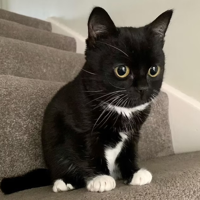

In [18]:
image_kater = Image.open('images/cat.jpg')
image_kater.resize((200, 200))

In [19]:
imgClassifier = pipeline(task='image-classification')

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [21]:
imgClassifier(image_kater)

[{'label': 'Egyptian cat', 'score': 0.8531320691108704},
 {'label': 'tabby, tabby cat', 'score': 0.04750381037592888},
 {'label': 'tiger cat', 'score': 0.034866224974393845},
 {'label': 'Persian cat', 'score': 0.00755581958219409},
 {'label': 'Siamese cat, Siamese', 'score': 0.003788580419495702}]